In [1]:
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.brutto import brutto_gen

#### Generate brutto formulas which we expect in samples

In [3]:
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3),"S":(0,1)})

#### Loading and assign brutto formules

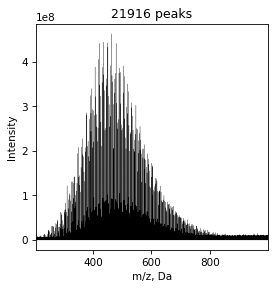

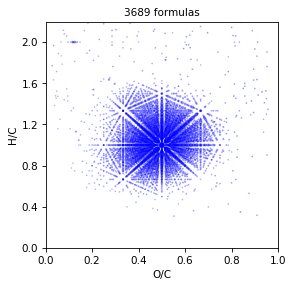

In [4]:
spec2 = MassSpectrum().load(filename="data/sample2.csv",
                            mapper={'m/z':'mass', "I":'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec2 = spec2.assign(generated_bruttos_table=gdf, rel_error=0.5)
spec2.draw()
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(spec2.table)
vk.draw_scatter(ax=ax)

#### Load assigned mass-list

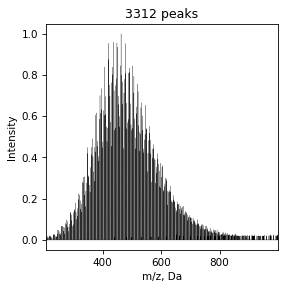

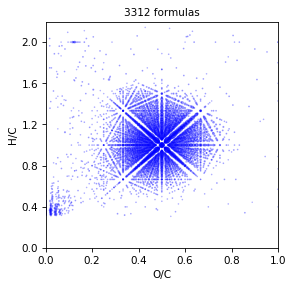

In [5]:
mapper = {"mw": "mass", "relativeAbundance": 'intensity'}
spec1 = MassSpectrum().load("data/sample1.csv",
                            mapper = mapper,
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"],
                            assign_mark=True
                           )
spec1.draw()
vk = VanKrevelen(spec1.table).draw_scatter()

#### Search for common formulas

In [ ]:
common = spec1 & spec2
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table)
vk.draw_scatter(ax=ax)

#### Search for the symmetric difference

In [ ]:
common = spec1 ^ spec2
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table)
vk.draw_scatter(ax=ax)

#### Calculate simmetric indexes

In [ ]:
for index in ['cosine', 'tanimoto', 'jaccard']:
    value = spec1.calculate_simmilarity(spec2, mode=index)
    print(f'{index}: {round(value,3)} ')

Calculate DBE vs nO

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=75)

spec1.calculate_DBEvsO(ax=ax, olim=(7,19))
spec2.calculate_DBEvsO(ax=ax, olim=(7,19))

#### Also we can look for spec prepared by substraction by intensity and how its look

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=75)

spec1 = spec1.normalize()
spec2 = spec2.normalize()

sub1 = spec1.intens_sub(spec2)
sub2 = spec2.intens_sub(spec1)

sub1.calculate_DBEvsO(ax=ax, olim=(7,19))
sub2.calculate_DBEvsO(ax=ax, olim=(7,19))

it is rude, but we can consider that spec2 is more saturated.

#### Calculate molecular class zones and get density

In [ ]:
spec1_dens = spec1.get_mol_class_density()
spec2_dens = spec2.get_mol_class_density()
d = [spec1_dens, spec2_dens]

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=75)

labels = ['spec1', 'spec2']

width=0.35

bot = np.array([0 for i in d])
for key in d[0].keys():
    val = [i[key] for i in d]
    ax.bar(labels, val, width, label=key, bottom=bot)
    bot = bot + np.array(val)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Calc all

In [ ]:
spec1 = spec1.calculate_all()
spec2 = spec2.calculate_all()
spec1.table.info()

#### Plot DBE-O/C vs NOSC

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=100)

spec1.draw_scatter(x='NOSC', y='DBE-OC',ax=ax, color='blue', alpha=0.2)
spec2.draw_scatter(x='NOSC', y='DBE-OC',ax=ax, color='red', alpha=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-0.5,0.5)


In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=100)

spec1.draw_density('NOSC', color='blue', ax=ax)
spec2.draw_density('NOSC', color='red', ax=ax)


In [ ]:
spec1.draw_scatter(x='Ke', y='KMD', volume='intensity', size=3)